In [5]:
from transformers import AutoProcessor, AutoModel
import torch

device = "cuda" if torch.cuda.is_available() else "cpu"
model_id = "microsoft/xclip-base-patch32"

try:
    print(f"Attempting to load processor for {model_id}...")
    processor = AutoProcessor.from_pretrained(model_id)
    print("Processor loaded successfully.")

    print(f"Attempting to load model for {model_id}...")
    model = AutoModel.from_pretrained(model_id).to(device)
    print("Model loaded successfully.")
except Exception as e:
    print(f"ERROR loading model/processor: {e}")
    import traceback
    traceback.print_exc() # Print the full traceback

Attempting to load processor for microsoft/xclip-base-patch32...
Processor loaded successfully.
Attempting to load model for microsoft/xclip-base-patch32...
Model loaded successfully.


In [ ]:
VIDEO_MODEL_IDENTIFIERS = {
    'timesformer': "facebook/timesformer-base-finetuned-k400",
    'videomae': "MCG-NJU/videomae-base-finetuned-kinetics", # Using V2
    'xclip': "microsoft/xclip-base-patch32"
}

In [3]:
# Load model directly
from transformers import AutoImageProcessor, AutoModelForVideoClassification

cache_dir = "/data/gaurav.bhole/CSAI/Project/models"

processor = AutoImageProcessor.from_pretrained("MCG-NJU/videomae-base-finetuned-kinetics", cache_dir=cache_dir)
model = AutoModelForVideoClassification.from_pretrained("MCG-NJU/videomae-base-finetuned-kinetics", cache_dir=cache_dir)

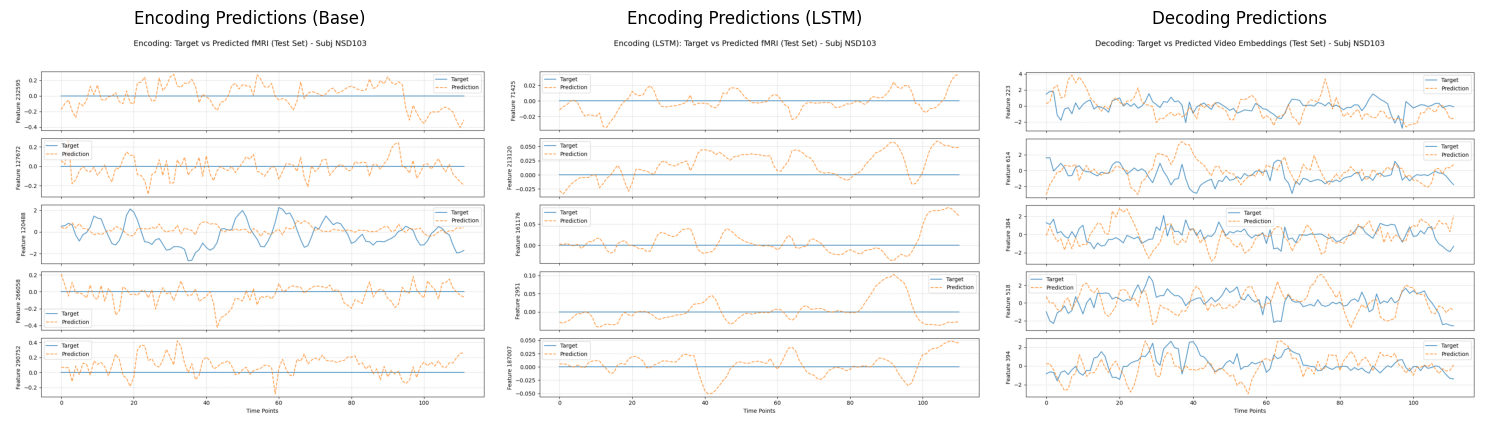

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Paths to the prediction images
img_paths = [
    "/data/gaurav.bhole/CSAI/Project/output/sub-NSD103_encoding_predictions.png",
    "/data/gaurav.bhole/CSAI/Project/output/sub-NSD103_encoding_predictions_lstm.png",
    "/data/gaurav.bhole/CSAI/Project/output/sub-NSD103_decoding_predictions.png"
]

titles = [
    "Encoding Predictions (Base)",
    "Encoding Predictions (LSTM)",
    "Decoding Predictions"
]

# Plotting the images
plt.figure(figsize=(15, 5))
for i, (path, title) in enumerate(zip(img_paths, titles)):
    img = mpimg.imread(path)
    plt.subplot(1, 3, i + 1)
    plt.imshow(img)
    plt.title(title)
    plt.axis('off')

plt.tight_layout()
plt.show()

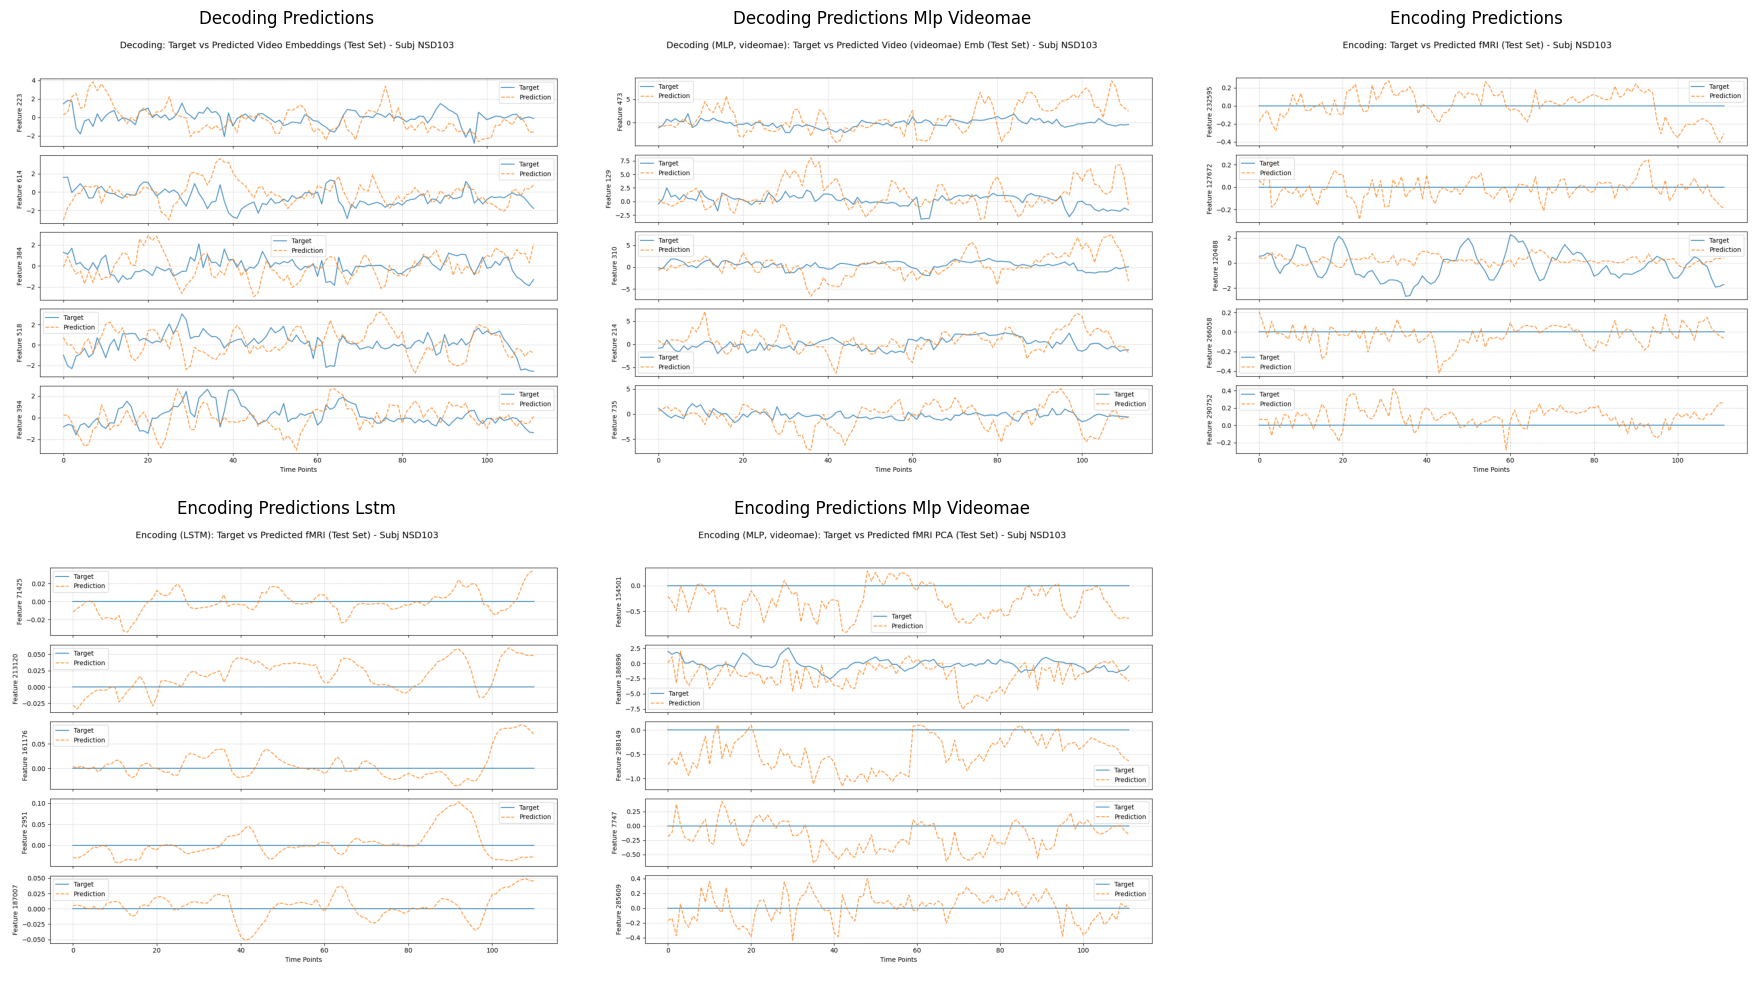

In [2]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os

# Base directory
base_dir = "/data/gaurav.bhole/CSAI/Project/output/"

# PNG filenames to plot
png_files = [
    "sub-NSD103_encoding_predictions.png",
    "sub-NSD103_encoding_predictions_lstm.png",
    "sub-NSD103_encoding_predictions_mlp_videomae.png",
    "sub-NSD103_decoding_predictions.png",
    "sub-NSD103_decoding_predictions_mlp_videomae.png"
]

# Optional: sort to keep consistent order if needed
png_files.sort()

# Plotting
plt.figure(figsize=(18, 10))
for i, filename in enumerate(png_files):
    img_path = os.path.join(base_dir, filename)
    img = mpimg.imread(img_path)
    plt.subplot(2, 3, i + 1)
    plt.imshow(img)
    plt.title(filename.replace("sub-NSD103_", "").replace("_", " ").replace(".png", "").title())
    plt.axis('off')

plt.tight_layout()
plt.show()

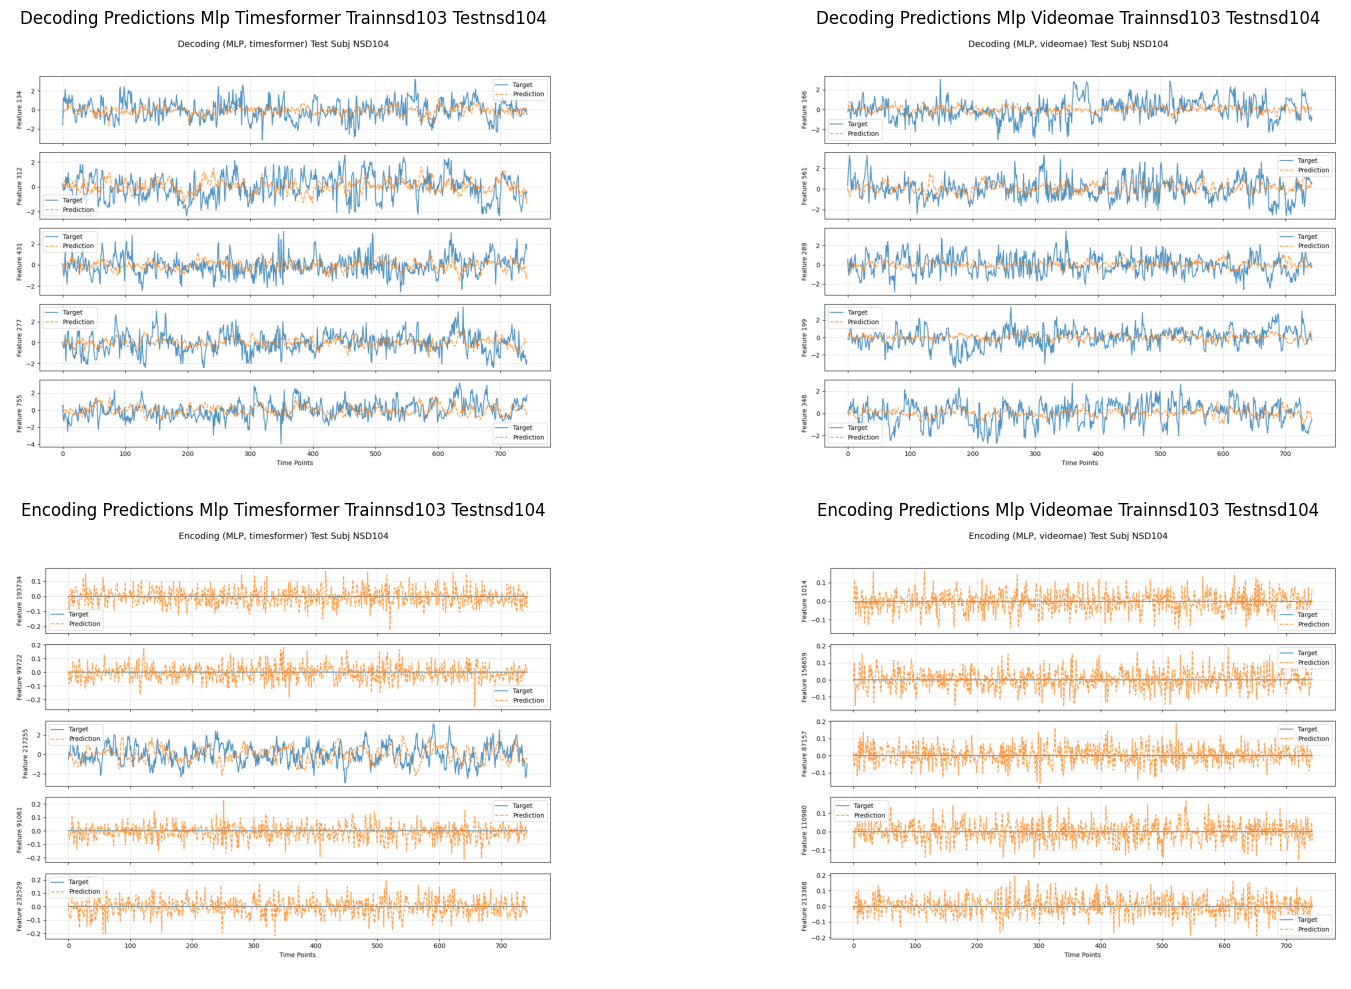

In [2]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os

# Base directory
base_dir = "/data/gaurav.bhole/CSAI/Project/output/"

# PNG filenames to plot
png_files = [
    "decoding_predictions_mlp_timesformer_trainNSD103_testNSD104.png",
    "decoding_predictions_mlp_videomae_trainNSD103_testNSD104.png",
    "encoding_predictions_mlp_timesformer_trainNSD103_testNSD104.png",
    "encoding_predictions_mlp_videomae_trainNSD103_testNSD104.png",
]

# Optional: sort to keep consistent order if needed
png_files.sort()

# Plotting
plt.figure(figsize=(18, 10))
for i, filename in enumerate(png_files):
    img_path = os.path.join(base_dir, filename)
    img = mpimg.imread(img_path)
    plt.subplot(2, 2, i + 1)
    plt.imshow(img)
    plt.title(filename.replace("sub-NSD103_", "").replace("_", " ").replace(".png", "").title())
    plt.axis('off')

plt.tight_layout()
plt.show()